# [**Régression Theil-Sen**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_1_linear_model/plot_theilsen.ipynb)<br/>([_Theil-Sen Regression_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html))

Calcule une régression Theil-Sen sur un ensemble de données synthétiques.

Consultez [**L'estimateur Theil-Sen : un estimateur basé sur la médiane généralisée** (1.1.16.3)](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) pour plus d'informations sur le régresseur.

Comparé à l'estimateur OLS (moindres carrés ordinaires), l'estimateur Theil-Sen est robuste face aux valeurs aberrantes. Il a un point de rupture d'environ 29,3 % en cas de régression linéaire simple, ce qui signifie qu'il peut tolérer des données corrompues (valeurs aberrantes) arbitraires jusqu'à 29,3 % dans le cas bidimensionnel.

L'estimation du modèle est réalisée en calculant les pentes et les intercepts d'une sous-population de toutes les combinaisons possibles de p points sous-échantillonnés. Si une ordonnée à l'origine est ajustée, p doit être supérieur ou égal à n_features + 1. La pente et l'ordonnée à l'origine finales sont ensuite définies comme la médiane spatiale de ces pentes et ordonnées à l'origine.

Dans certains cas, Theil-Sen fonctionne mieux que [**RANSAC** (1.1.16.2)](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression), qui est également une méthode robuste. Cela est illustré dans le deuxième exemple ci-dessous, où les valeurs aberrantes par rapport à l'axe x perturbent RANSAC. L'ajustement du paramètre `residual_threshold` de RANSAC remédie à cela, mais en général, une connaissance a priori des données et de la nature des valeurs aberrantes est nécessaire. En raison de la complexité de calcul de Theil-Sen, il est recommandé de l'utiliser uniquement pour les problèmes de petite taille en termes de nombre d'échantillons et de caractéristiques. Pour les problèmes plus importants, le paramètre `max_subpopulation` restreint la magnitude de toutes les combinaisons possibles de p points sous-échantillonnés à un sous-ensemble choisi au hasard, limitant ainsi également le temps d'exécution. Par conséquent, Theil-Sen est applicable à des problèmes plus importants, avec l'inconvénient de perdre certaines de ses propriétés mathématiques, car il travaille ensuite sur un sous-ensemble aléatoire.

In [1]:
# Author: Florian Wilhelm -- <florian.wilhelm@gmail.com>
# License: BSD 3 clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
]
colors = {"OLS": "turquoise", "Theil-Sen": "gold", "RANSAC": "lightgreen"}
lw = 2

# Valeurs aberrantes uniquement dans la direction `y`

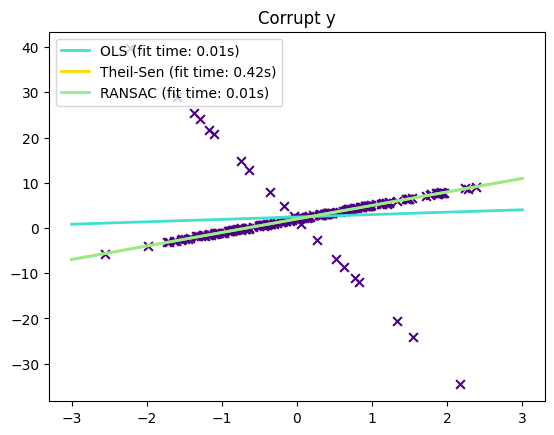

In [2]:
np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.0
c = 2.0
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color="indigo", marker="x", s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
_ = plt.title("Corrupt y")

# Valeurs aberrantes dans la direction `X`

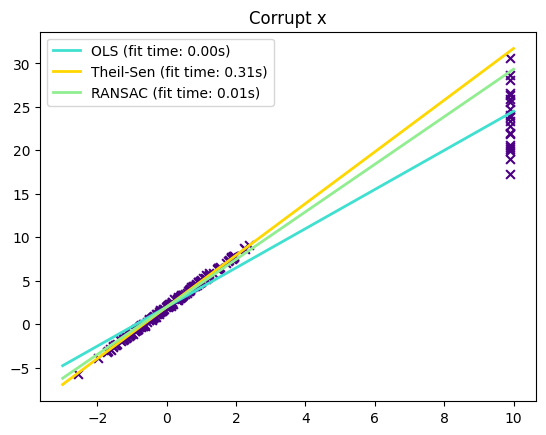

In [3]:
np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color="indigo", marker="x", s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt x")
plt.show()